In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
df = pd.read_csv('nba2k20-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [4]:
df.shape

(429, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB


In [6]:
df = df.dropna()

In [7]:
df.isnull().sum().sum()

0

In [8]:
df = df.drop(['full_name', 'b_day', 'height', 'weight', 'college'], axis = 1)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,#2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
3,96,#7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,#13,Houston Rockets,G,$38199000,USA,2009,1,3
5,95,#30,Golden State Warriors,G,$40231758,USA,2009,1,7
6,94,#3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1


In [9]:
def removehash(value):
    value = value[1:]
    return int(value)

df['jersey'] = df['jersey'].apply(removehash)

In [10]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,$38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,$40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1


In [11]:
df['salary'] = df['salary'].apply(removehash)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1


<AxesSubplot:>

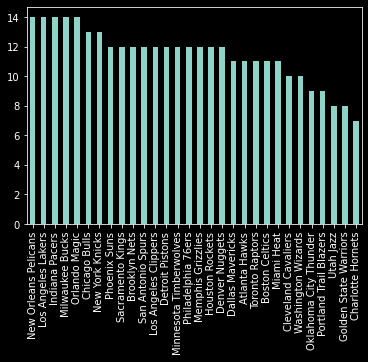

In [12]:
df['team'].value_counts().plot(kind='bar')

<AxesSubplot:>

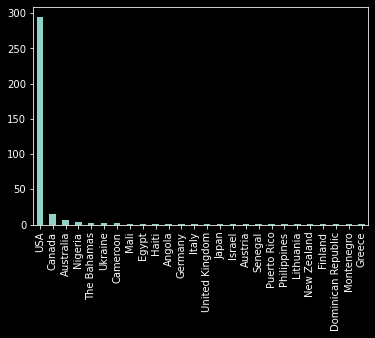

In [13]:
df['country'].value_counts().plot(kind='bar')

<AxesSubplot:>

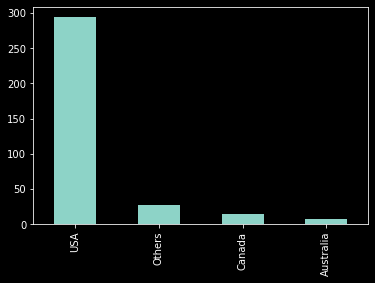

In [14]:
def removecountryoutlier(value):
    if value not in ['USA', 'Canada', 'Australia']:
        return 'Others'
    else:
        return value

df['country'] = df['country'].apply(removecountryoutlier)
df['country'].value_counts().plot(kind='bar')
   

<AxesSubplot:>

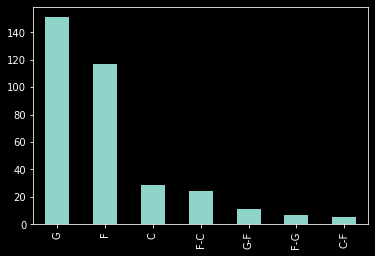

In [15]:
df['position'].value_counts().plot(kind='bar')

In [16]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1


In [17]:
df['draft_round'].unique

<bound method Series.unique of 1              1
3              1
4              1
5              1
6              1
         ...    
423            2
424    Undrafted
425            2
426    Undrafted
428    Undrafted
Name: draft_round, Length: 344, dtype: object>

In [18]:
df['draft_peak'].unique

<bound method Series.unique of 1             15
3              2
4              3
5              7
6              1
         ...    
423           58
424    Undrafted
425           60
426    Undrafted
428    Undrafted
Name: draft_peak, Length: 344, dtype: object>

In [19]:
def removeundrafted(value):
    if value=='Undrafted':
        return 
    else:
        return value
    
df['draft_round'] = df['draft_round'].apply(removeundrafted)
df['draft_peak'] = df['draft_peak'].apply(removeundrafted)

df = df.dropna()

<AxesSubplot:>

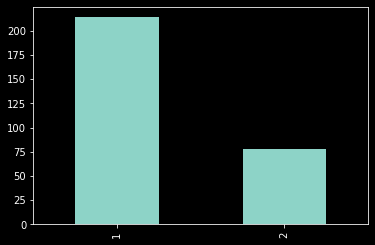

In [20]:
df['draft_round'].value_counts().plot(kind='bar')

<AxesSubplot:>

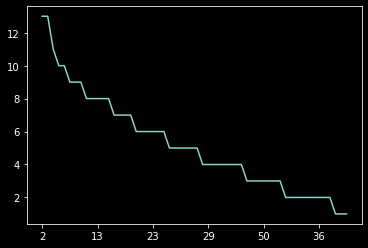

In [21]:
df['draft_peak'].value_counts().plot()

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['position'] = le.fit_transform(df['position'])
df['country'] = le.fit_transform(df['country'])
df['team'] = le.fit_transform(df['team'])

df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,12,2,32742000,3,2011,1,15
3,96,7,2,2,37199000,3,2007,1,2
4,96,13,10,5,38199000,3,2009,1,3
5,95,30,9,5,40231758,3,2009,1,7
6,94,3,13,3,27093019,3,2012,1,1


In [23]:
x = df.drop(['salary'], axis = 1)
y = df['salary']

In [24]:
#base de donnée d'entrainement
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [29]:
print(x_train.shape)
print(x_test.shape)

(233, 8)
(59, 8)


In [25]:
#Entrainement du modele
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)


In [30]:
print(predictions)

[20659668.10359406  8932224.83320022  7676869.44517469  2378896.2191143
  -107369.98017907 18845758.59869623  2895279.82177234 23087990.91938257
 -2894118.80956483   662952.04452229  9854366.83148646  5825077.27301955
  -629357.32635641  2574958.81499481   -88936.50364757 22400796.06683111
  4508752.41642523 10810391.75316215  1373664.63188434  5036186.45013189
  1368945.70154285  5653615.22560358 24442332.78492975 -2041774.81349826
 32418104.93858528 -3510077.80945516 10009051.60398149 17991139.66032648
  8360886.06841278 -2122679.71458149  6276918.65862489 11761436.29134989
  5936063.07548881  5020233.0670979   5947861.75628734 -1680775.64040256
  2744920.61118722 -1418245.3711431  12925742.54726267  9019617.70722032
 12855689.2440083  11877389.57361746  7811868.50426197  1803960.34308577
 14425672.20740604 13376051.56233835 25118890.66893673  6106622.0882082
  6578395.11350632  7386889.8861711   5471447.35020304  -846101.86642885
 -1942586.61289358  7461713.85170984  -621838.6250653

In [31]:
print(y_test)

28     27285000
156    10259375
263     2174318
244     4240200
352     2964840
32     27285000
278     1416852
36     26131111
416     1000000
391    13290395
229    12678571
180     2636280
389     1416852
277     1618520
363     1925880
15     32742000
370     2028594
110    27504630
338     3058800
295     2028594
304     1897800
239     9073050
19     32742000
377     2063520
5      40231758
399     2033160
193     2174310
80      7317074
157     3481985
392     1416852
172     1416852
54      8556120
183     7059480
265    10116576
218     2500000
425       79568
259     2813280
409      898310
89     11060000
91      3454080
88     10116576
94     24147727
179     5718000
272     4469160
74     19863636
178     3405180
13     32742000
243     4000000
112     7839960
232     1845301
224     3581986
342     3458400
390     1416852
159     4764960
400     1416852
269     1937520
140     5697600
26     21000000
65      9562920
Name: salary, dtype: int64


In [34]:
diff = y_test - predictions
print(diff)

28     6.625332e+06
156    1.327150e+06
263   -5.502551e+06
244    1.861304e+06
352    3.072210e+06
32     8.439241e+06
278   -1.478428e+06
36     3.043120e+06
416    3.894119e+06
391    1.262744e+07
229    2.824204e+06
180   -3.188797e+06
389    2.046209e+06
277   -9.564388e+05
363    2.014817e+06
15     1.034120e+07
370   -2.480158e+06
110    1.669424e+07
338    1.685135e+06
295   -3.007592e+06
304    5.288543e+05
239    3.419435e+06
19     8.299667e+06
377    4.105295e+06
5      7.813653e+06
399    5.543238e+06
193   -7.834742e+06
80    -1.067407e+07
157   -4.878901e+06
392    3.539532e+06
172   -4.860067e+06
54    -3.205316e+06
183    1.123417e+06
265    5.096343e+06
218   -3.447862e+06
425    1.760344e+06
259    6.835939e+04
409    2.316555e+06
89    -1.865743e+06
91    -5.565538e+06
88    -2.739113e+06
94     1.227034e+07
179   -2.093869e+06
272    2.665200e+06
74     5.437964e+06
178   -9.970872e+06
13     7.623109e+06
243   -2.106622e+06
112    1.261565e+06
232   -5.541589e+06


In [35]:
#Calculer la performance du modele avec MSE <erreur>
print(np.mean((y_test-predictions)**2))

29424391266901.46


C:\Users\sance\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

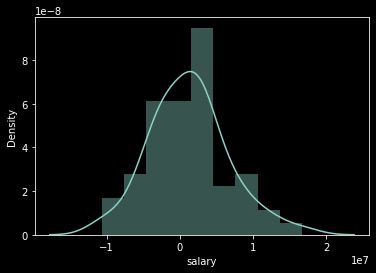

In [36]:
import seaborn as sns
sns.distplot(diff)

In [37]:
import pickle
pickle.dump(lr, open('./model.sav', 'wb'))